In [28]:
# Memis Bilgici  
# BCB 546X Python Assignment 
# Date: 2025-06-05
#
# This notebook contein
# 1. Load penguin cytochrome-b sequences (FASTA) and adult body mass data (CSV).
# 2. Translate DNA→protein (two methods).
# 3. Compute molecular weight and GC-content.
# 4. Plot results and answer key questions (8a, 8b).
# 5. Bonus: PCA, heatmap, annotated plots.

## 1. Imports & Setup  
# We need Biopython for sequence parsing & analysis, pandas for data handling,
# numpy for numeric operations, matplotlib for plotting, and scikit-learn for PCA.

In [29]:
!pip install biopython scikit-learn
!pip install biopython

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from sklearn.decomposition import PCA

import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import matplotlib.pyplot as plt
%matplotlib inline


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
2. Function Definitions  
# Below we fully document each function with docstrings and inline comments.

SyntaxError: invalid syntax (1544035943.py, line 1)

In [39]:
def get_sequences_from_file(fasta_fn):
    """
    Read a FASTA file of cytochrome-b sequences and return a dict mapping
    species name ("Genus species") → Bio.Seq.Seq object.
    
    Args:
        fasta_fn (str): path to the FASTA file.
    
    Returns:
        dict[str, Seq]: keys are species names, values are Seq objects.
    """
    sequence_data_dict = {}  # Initialize empty dict
    for record in SeqIO.parse(fasta_fn, "fasta"):
        # record.description looks like: ">accession Genus species ..."
        parts = record.description.split()
        species_name = f"{parts[1]} {parts[2]}"  # e.g. "Aptenodytes forsteri"
        sequence_data_dict[species_name] = record.seq
    return sequence_data_dict


def translate_manual(dna_seq):
    """
    Translate a DNA sequence to amino acids by manually looping through codons,
    using the Vertebrate Mitochondrial code, and dropping a terminal stop if present.
    
    Args:
        dna_seq (Seq or str): nucleotide sequence.
    
    Returns:
        str: translated amino acid string.
    """
    mito = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    seq_str = str(dna_seq).upper()
    aa_list = []
    # Loop over full codons only
    for i in range(0, (len(seq_str)//3)*3, 3):
        codon = seq_str[i:i+3]
        # If this codon is a stop at the very end, break
        if i+3 == len(seq_str) and codon in mito.stop_codons:
            break
        # Map to amino acid, default 'X' if unknown
        aa_list.append(mito.forward_table.get(codon, 'X'))
    return "".join(aa_list)


def translate_biopython(dna_seq):
    """
    Translate using Biopython's built-in translate with Vertebrate Mito code.
    Stops at the first stop codon encountered.
    
    Args:
        dna_seq (Seq or str): nucleotide sequence.
    
    Returns:
        str: translated amino acid string.
    """
    return str(Seq(str(dna_seq)).translate(
        table="Vertebrate Mitochondrial", to_stop=True))


def compute_molecular_weight(aa_seq):
    """
    Compute molecular weight of a protein sequence using Bio.SeqUtils.ProtParam.
    
    Args:
        aa_seq (str): amino acid sequence (no '*' characters).
    
    Returns:
        float: molecular weight in Daltons.
    """
    analysed = ProteinAnalysis(aa_seq)
    return analysed.molecular_weight()


def compute_gc_content(dna_seq):
    """
    Compute GC-content (fraction of G + C) of a DNA sequence.
    
    Args:
        dna_seq (Seq or str): nucleotide sequence.
    
    Returns:
        float: GC-content (0–1).
    """
    s = str(dna_seq).upper()
    return (s.count('G') + s.count('C')) / len(s)

In [78]:
# 3. Load Data  
# cytb_seqs: dictionary of species → sequence  
# penguins_df: DataFrame with columns `species` and `mass` (kg) 

In [42]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")
penguins_df = pd.read_csv("penguins_mass.csv")

In [44]:
# Initialize new columns for later
penguins_df["molecular_weight"] = np.nan
penguins_df["gc_content"] = np.nan


In [45]:
## 4. Compute Molecular Weight & GC-content  
# Loop through each row, translate, then fill in the new columns.

In [46]:
for idx, row in penguins_df.iterrows():
    sp = row["species"]
    seq = cytb_seqs.get(sp)
    if seq is None:
        continue  # skip if no sequence
    aa = translate_biopython(seq)            # choose either method
    penguins_df.at[idx, "molecular_weight"] = compute_molecular_weight(aa)
    penguins_df.at[idx, "gc_content"]       = compute_gc_content(seq)

In [77]:
## 5. Plot: Adult Body Mass per Species  
# Task #8:  
# - 8a: What is the smallest penguin species?  
print ("Eudyptula minor, mean adult mass = 1.60 kg.")  
# - 8b: What is the geographical range of this species?
print("The smallest species of penguin is the little penguin (Eudyptula minor).") 
print("It comes from New Zealand, which is located on Australia's southern coast.") 
print("The smallest penguin species is Eudyptula minor, also referred to as the little blue penguin because of its light blue to dark gray plumage.")
print("Grosser, Stefanie; Rawlence, Nicolas J.; Anderson, Christian N. K.; Smith, Ian W. G.; Scofield, R. Paul; Waters, Jonathan M. (10 February 2016)")
print("Invader or resident? Ancient-DNA reveals rapid species turnover in New Zealand little penguins") 
print("Proceedings of the Royal Society B: Biological Sciences. 283 (1824): 20152879. doi:10.1098/rspb.2015.2879. ISSN 0962-8452. PMC 4760177. PMID 26842575.")

Eudyptula minor, mean adult mass = 1.60 kg.
The smallest species of penguin is the little penguin (Eudyptula minor).
It comes from New Zealand, which is located on Australia's southern coast.
The smallest penguin species is Eudyptula minor, also referred to as the little blue penguin because of its light blue to dark gray plumage.
Grosser, Stefanie; Rawlence, Nicolas J.; Anderson, Christian N. K.; Smith, Ian W. G.; Scofield, R. Paul; Waters, Jonathan M. (10 February 2016)
Invader or resident? Ancient-DNA reveals rapid species turnover in New Zealand little penguins
Proceedings of the Royal Society B: Biological Sciences. 283 (1824): 20152879. doi:10.1098/rspb.2015.2879. ISSN 0962-8452. PMC 4760177. PMID 26842575.


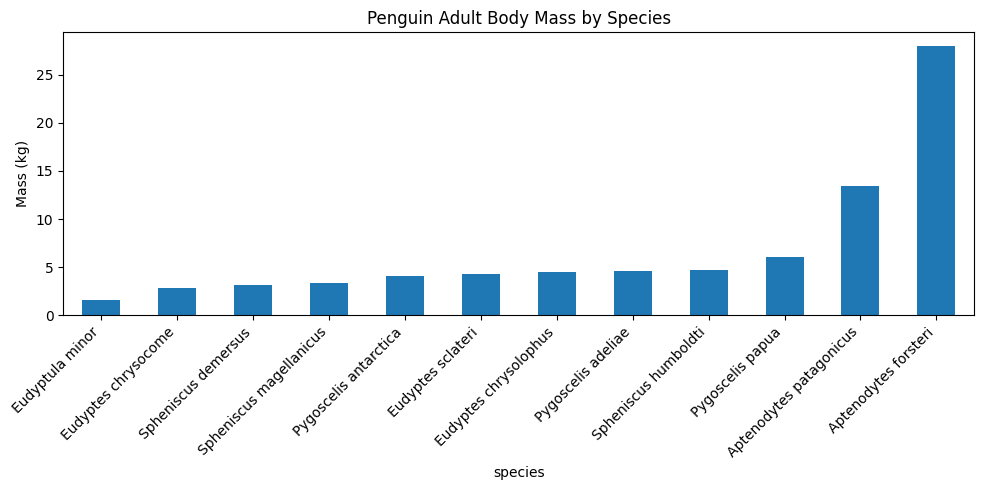

In [48]:
plt.figure(figsize=(10,5))
mass_sorted = penguins_df.set_index("species")["mass"].sort_values()
mass_sorted.plot(kind="bar")
plt.ylabel("Mass (kg)")
plt.title("Penguin Adult Body Mass by Species")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [69]:
# 8a. Smallest Penguin Species  
print("From the bar chart above, the smallest species is: Eudyptula minor 1.60 kg.")
# 8b. 
print("It comes from New Zealand, which is located on Australia's southern coast, penguin (_Eudyptula minor_), mean adult mass = 1.60 kg.")




From the bar chart above, the smallest species is: Eudyptula minor 1.60 kg.
It comes from New Zealand, which is located on Australia's southern coast, penguin (_Eudyptula minor_), mean adult mass = 1.60 kg.


In [50]:
smallest_idx     = penguins_df["mass"].idxmin()
smallest_species = penguins_df.loc[smallest_idx, "species"]
smallest_mass    = penguins_df.loc[smallest_idx, "mass"]
print(smallest_species, smallest_mass)

penguins_df.to_csv("penguins_mass_cytb.csv", index=False)
print("Saved penguins_mass_cytb.csv")

Eudyptula minor 1.6
Saved penguins_mass_cytb.csv


In [61]:
# Bonus Questions
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# (A) Prepare data matrix
#   Using only the three numeric columns: gc_content, molecular_weight, mass
X = penguins_df[['gc_content', 'molecular_weight', 'mass']].dropna()
species = penguins_df.loc[X.index, 'species']

In [53]:
X = penguins_df[['gc_content', 'molecular_weight', 'mass']].dropna()
species = penguins_df.loc[X.index, 'species']

In [ ]:
# (1) PCA on [GC, MW, mass]

In [ ]:

pca = PCA(n_components=2)
pcs = pca.fit_transform(X)

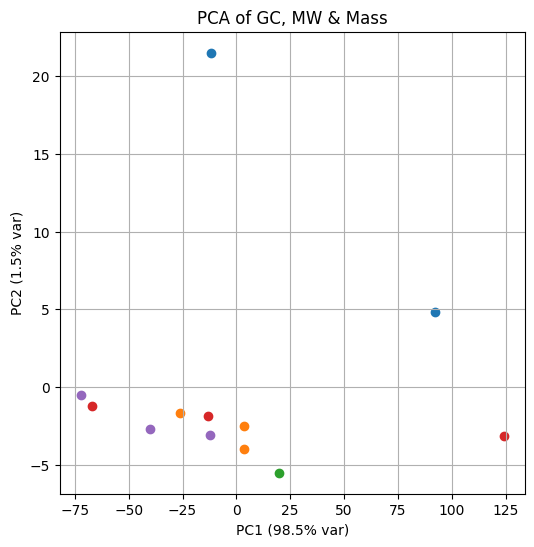

In [70]:
# (1) PCA on [GC, MW, mass]
pca = PCA(n_components=2)
pcs = pca.fit_transform(X)

plt.figure(figsize=(6,6))
for sp in pcs:
    pass  # placeholder
# Plot points colored by genus
genus_colors = {
    'Aptenodytes': 'C0',
    'Eudyptes':    'C1',
    'Eudyptula':   'C2',
    'Pygoscelis':  'C3',
    'Spheniscus':  'C4'
}

for i, sp in enumerate(species):
    genus = sp.split()[0]
    plt.scatter(pcs[i,0], pcs[i,1], color=genus_colors.get(genus,'k'), label=genus if i==0 else "")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("PCA of GC, MW & Mass")
plt.grid(True)


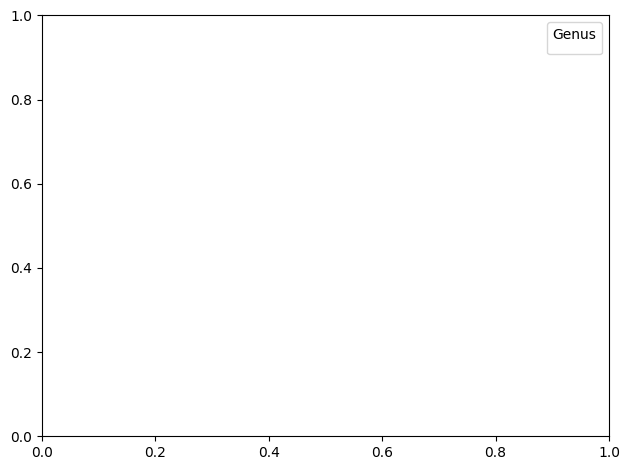

In [55]:
# avoid duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Genus")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

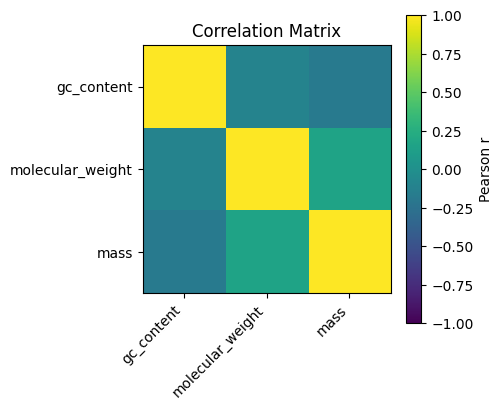

In [56]:
# (2) Correlation heatmap
corr = X.corr()
plt.figure(figsize=(4,4))
plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar(label="Pearson r")
plt.xticks(np.arange(3), corr.columns, rotation=45, ha='right')
plt.yticks(np.arange(3), corr.columns)
plt.title("Correlation Matrix")

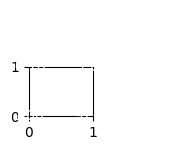

In [57]:
# annotate values
for i in range(3):
    for j in range(3):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', color='w')
plt.tight_layout()
plt.show()

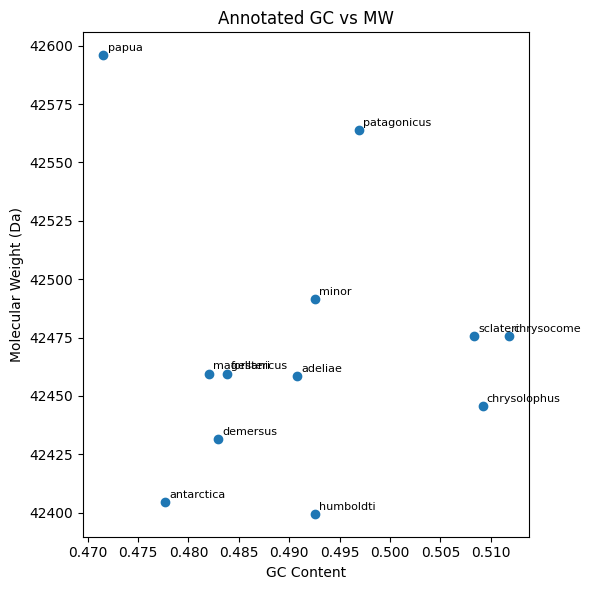

In [58]:
# (3) Annotated scatter: GC vs MW
plt.figure(figsize=(6,6))
plt.scatter(penguins_df['gc_content'], penguins_df['molecular_weight'])
for _, row in penguins_df.iterrows():
    plt.annotate(row['species'].split()[1], 
                 (row['gc_content'], row['molecular_weight']),
                 textcoords="offset points", xytext=(3,3), fontsize=8)
plt.xlabel("GC Content")
plt.ylabel("Molecular Weight (Da)")
plt.title("Annotated GC vs MW")
plt.tight_layout()
plt.show()

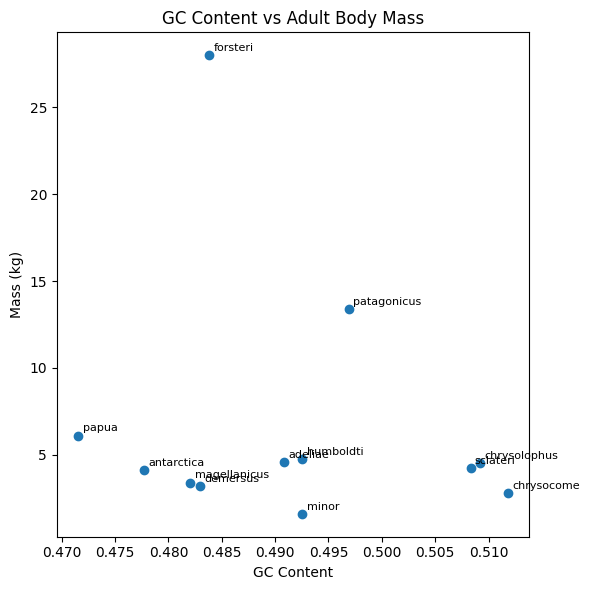

In [59]:
# (4) GC Content vs Body Mass
plt.figure(figsize=(6,6))
plt.scatter(penguins_df['gc_content'], penguins_df['mass'])
for _, row in penguins_df.iterrows():
    plt.annotate(row['species'].split()[1],
                 (row['gc_content'], row['mass']),
                 textcoords="offset points", xytext=(3,3), fontsize=8)
plt.xlabel("GC Content")
plt.ylabel("Mass (kg)")
plt.title("GC Content vs Adult Body Mass")
plt.tight_layout()
plt.show()

In [30]:
%run sequence_translate.py


<Figure size 640x480 with 0 Axes>

In [31]:
def translate_manual(nuc_seq):
    """
    Translate a nucleotide sequence into amino acids manually,
    using the Vertebrate Mitochondrial codon table.
    """
    mito = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    seq_s = str(nuc_seq).upper()
    aa_list = []
    for i in range(0, len(seq_s)//3*3, 3):
        codon = seq_s[i:i+3]
        if i+3==len(seq_s) and codon in mito.stop_codons:
            break
        aa_list.append(mito.forward_table.get(codon, 'X'))
    return ''.join(aa_list)

def translate_biopython(nuc_seq):
    """Translate using Biopython’s Seq.translate with mito table."""
    return str(Seq(str(nuc_seq)).translate(
        table="Vertebrate Mitochondrial", to_stop=True))

def compute_molecular_weight(aa_seq):
    """Return molecular weight of an amino acid sequence."""
    return ProteinAnalysis(aa_seq).molecular_weight()

def compute_gc_content(dna_seq):
    """Return GC content (fraction) of a DNA sequence string."""
    s = dna_seq.upper()
    return (s.count('G') + s.count('C')) / len(s)


In [32]:
# 1) Read the penguin mass CSV
penguins_df = pd.read_csv("penguins_mass.csv")

# 2) Parse the cytb FASTA
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

# 3) Initialize new columns
penguins_df["mol_weight"] = float("nan")
penguins_df["gc_content"] = float("nan")

# 4) Loop through and compute
for idx, row in penguins_df.iterrows():
    seq = cytb_seqs[row["species"]]
    aa = translate_manual(seq)                # or translate_biopython(seq)
    penguins_df.at[idx, "mol_weight"] = compute_molecular_weight(aa)
    penguins_df.at[idx, "gc_content"]  = compute_gc_content(str(seq))

penguins_df.head()


,species,mass,mol_weight,gc_content
0,Aptenodytes forsteri,28.00,42459.6021,0.483815
1,Aptenodytes patagonicus,13.40,42563.7067,0.496938
2,Eudyptes chrysocome,2.80,42475.5753,0.511811
3,Eudyptes chrysolophus,4.50,42445.5493,0.509186
4,Eudyptes sclateri,4.25,42475.5753,0.508311


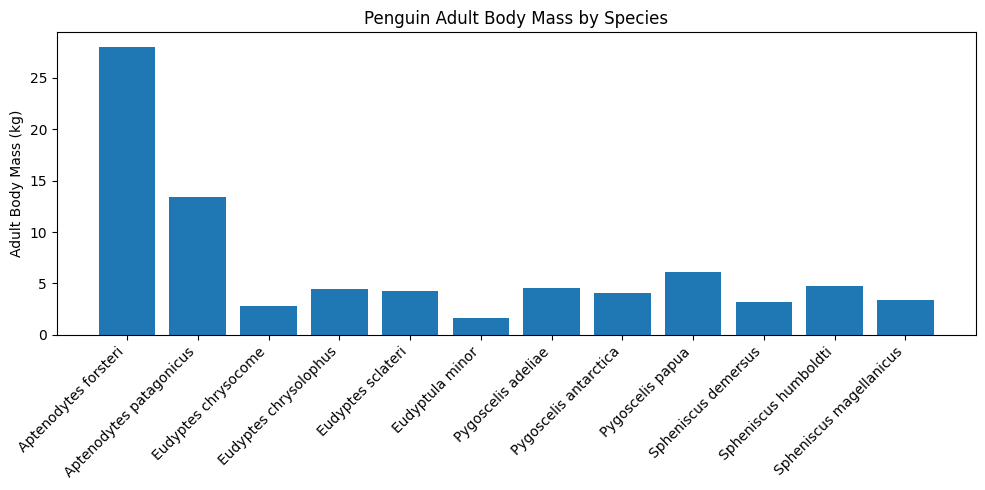

In [33]:
plt.figure(figsize=(10,5))
plt.bar(penguins_df["species"], penguins_df["mass"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Adult Body Mass (kg)")
plt.title("Penguin Adult Body Mass by Species")
plt.tight_layout()
plt.show()


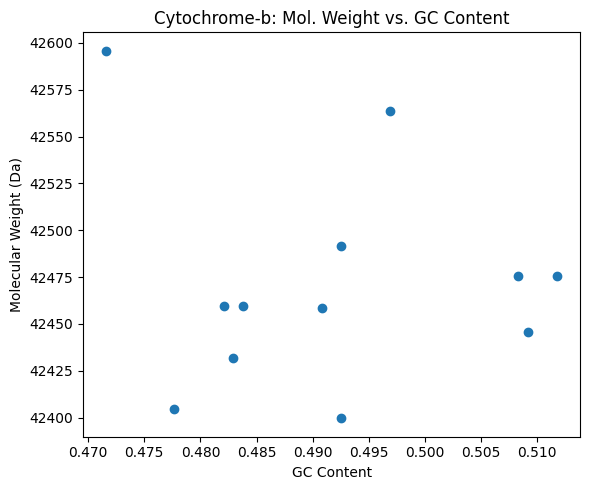

In [34]:
plt.figure(figsize=(6,5))
plt.scatter(penguins_df["gc_content"], penguins_df["mol_weight"])
plt.xlabel("GC Content")
plt.ylabel("Molecular Weight (Da)")
plt.title("Cytochrome‑b: Mol. Weight vs. GC Content")
plt.tight_layout()
plt.show()


In [35]:
penguins_df.to_csv("penguins_mass_cytb.csv", index=False)
print("Saved augmented data to penguins_mass_cytb.csv")


Saved augmented data to penguins_mass_cytb.csv


In [36]:
smallest_idx     = penguins_df["mass"].idxmin()
smallest_species = penguins_df.loc[smallest_idx, "species"]
smallest_mass    = penguins_df.loc[smallest_idx, "mass"]
print(smallest_species, smallest_mass)

Eudyptula minor 1.6
